# Tutorial Notebook

## 0. Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import fasttreeshap
import matplotlib.pyplot as plt
import pandas as pd
import shap

from src.utils import _eval_pred, _fit_pipeline, _get_X_y_idx, _set_train_test

In [4]:
y_label = "cardio"
id_col = "id"
trainer = ("xgb", "classifier")
n_features = 5
n_trials = 100

In [5]:
df = pd.read_csv("data/cardio_train.csv", sep=";")
categorical_cols = ["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"]
df[categorical_cols] = df[categorical_cols].astype("object")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## 1. ML pipeline execution

In [6]:
X, y, idx = _get_X_y_idx(df=df, id_col=id_col, y_label=y_label, trainer=trainer)

input data shape: (70000, 12)
input outcome shape: (70000, 1)


In [7]:
X_train, X_test, y_train, y_test, _, idx_test = _set_train_test(trainer, X, y, idx)

In [8]:
fitted_pipeline = _fit_pipeline(
    X_train=X_train,
    y_train=y_train,
    trainer=trainer,
    fname=f"{trainer[0]}_{trainer[1]}__{y_label}",
    n_features=n_features,
    n_trials=n_trials,
)

measure_of_accuracy = f1_score(y_true, y_pred, average='macro')

pre-SHAP init:
- X_train.shape:(56000, 12)
- y_train.shape(56000, 1)


[I 2025-04-14 02:34:54,303] A new study created in memory with name: feature_selection
[I 2025-04-14 02:34:58,723] Trial 0 finished with value: 0.39237277234486095 and parameters: {'objective': 'binary:logistic', 'eval_metric': 'auc', 'gamma': 3, 'learning_rate': 0.13103143857073918, 'max_bin': 18, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 101, 'n_jobs': -1, 'random_state': 19920722, 'reg_alpha': 1, 'reg_lambda': 1, 'scale_pos_weight': 17.485604649374103}. Best is trial 0 with value: 0.39237277234486095.
[I 2025-04-14 02:35:17,571] Trial 1 finished with value: 0.6141272396326733 and parameters: {'objective': 'binary:logistic', 'eval_metric': 'auc', 'gamma': 3, 'learning_rate': 0.21295346204423066, 'max_bin': 17, 'max_depth': 15, 'min_child_weight': 1, 'n_estimators': 160, 'n_jobs': -1, 'random_state': 19920722, 'reg_alpha': 5, 'reg_lambda': 5, 'scale_pos_weight': 12.890009117909408}. Best is trial 1 with value: 0.6141272396326733.
[I 2025-04-14 02:35:20,435] Trial 2 finish

pre-SHAP done - 1200.2079238891602 seconds

SHAP init:
- X_train.shape:(56000, 12)
- y_train.shape(56000, 1)
SHAP done - 296.5625960826874 seconds


[I 2025-04-14 02:59:51,210] A new study created in memory with name: LohrasbOptimizer_xgb_classifier
[I 2025-04-14 02:59:53,960] Trial 0 finished with value: 0.3870430924698454 and parameters: {'objective': 'binary:logistic', 'eval_metric': 'auc', 'gamma': 3, 'learning_rate': 0.13103143857073918, 'max_bin': 18, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 101, 'n_jobs': -1, 'random_state': 19920722, 'reg_alpha': 1, 'reg_lambda': 1, 'scale_pos_weight': 17.485604649374103}. Best is trial 0 with value: 0.3870430924698454.
[I 2025-04-14 03:00:03,127] Trial 1 finished with value: 0.513984168155378 and parameters: {'objective': 'binary:logistic', 'eval_metric': 'auc', 'gamma': 3, 'learning_rate': 0.21295346204423066, 'max_bin': 17, 'max_depth': 15, 'min_child_weight': 1, 'n_estimators': 160, 'n_jobs': -1, 'random_state': 19920722, 'reg_alpha': 5, 'reg_lambda': 5, 'scale_pos_weight': 12.890009117909408}. Best is trial 1 with value: 0.513984168155378.
[I 2025-04-14 03:00:04,992] Tria

######################################
- final_pipeline__xgb_classifier__cardio.joblib saved.
######################################


In [9]:
y_pred, acc = _eval_pred(pip=fitted_pipeline, trainer=trainer, X=X_test, y=y_test)

F1 score : 0.7285255677224505
Classification report : 
              precision    recall  f1-score   support

           0       0.74      0.71      0.72      7004
           1       0.72      0.75      0.73      6996

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000

Confusion matrix : 
[[4955 2049]
 [1750 5246]]


In [11]:
y_pred

array([0.5470864 , 0.27265266, 0.39682922, ..., 0.7691408 , 0.24796712,
       0.51386374], dtype=float32)

In [12]:
acc

0.7285255677224505

## 2. SHAP explanation of the best estimator

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


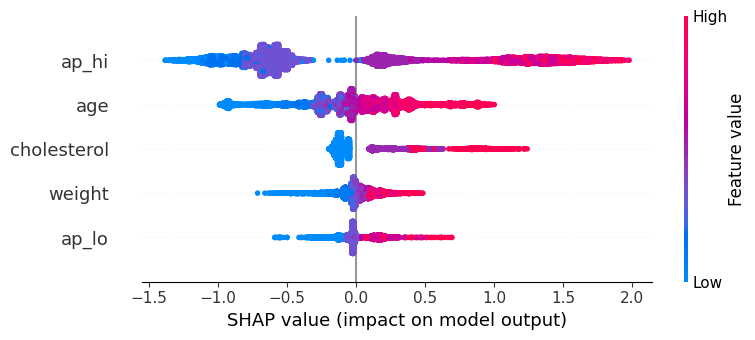

<Figure size 640x480 with 0 Axes>

In [10]:
plt.cla()
plt.clf()
fig = plt.gcf()

scaled_X_test = fitted_pipeline[:-1].transform(X_test)
estimator = fitted_pipeline[-1].best_estimator
explainer = fasttreeshap.TreeExplainer(estimator, algorithm="v2", n_jobs=-1)
shap_values = explainer.shap_values(scaled_X_test)

shap.summary_plot(shap_values, scaled_X_test, max_display=n_features, show=True)
plt.close()
plt.cla()
plt.clf()